In [1]:
import gensim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from spectral_embedding import *
from sklearn.manifold import SpectralEmbedding
from sklearn.datasets import make_swiss_roll

## Data generating

Generate a Swiss roll data set and a visualise it

Change variable N for creating smaller/larger data set.

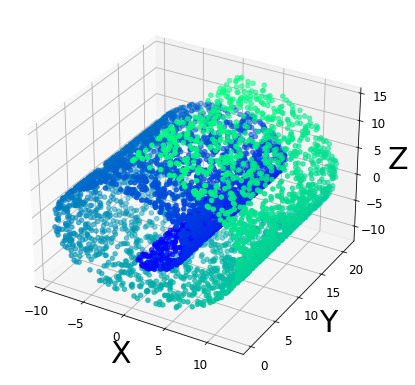

In [2]:
N = 5000
X_es, t = make_swiss_roll(N, random_state = 1337)

X = X_es[:, 0]
Y = X_es[:, 1]
Z = X_es[:, 2]

# Plot the figure
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211, projection='3d')

ax.scatter(X, Y, Z, c=t, cmap='winter')
ax.tick_params(labelsize = 'larger')
ax.set_xlabel("X", fontsize = 30)
ax.set_ylabel("Y", fontsize = 30)
ax.set_zlabel("Z", fontsize = 30)
#ax.set_xlim3d(-10,10)
#ax.set_ylim3d(0,10)
#ax.set_zlim3d(-10,10)

plt.show()

## Generate embedding space using Sklearn

In [3]:
#embedding = SpectralEmbedding(n_components=3)
embedding = SpectralEmbedding(n_components=3, affinity = 'rbf')
spectral_data = embedding.fit_transform(X_es)
print(spectral_data.shape, 2*'\n', embedding.get_params())

(5000, 3) 

 {'affinity': 'rbf', 'eigen_solver': None, 'gamma': None, 'n_components': 3, 'n_jobs': None, 'n_neighbors': None, 'random_state': None}


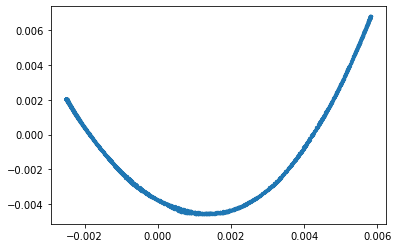

In [4]:
plt.scatter(spectral_data.T[0], spectral_data.T[1], s=5)
plt.show()

## Not used

In [5]:
data = np.loadtxt('../../Exercise_4/Task_2/data_DMAP_PCA_vadere.txt')
print(f'Data loaded with shape {np.shape(data)}')

Data loaded with shape (1000, 30)


In [6]:
embedding_ped = SpectralEmbedding(n_components=3)
spectral_data_ped = embedding_ped.fit_transform(data)
print(spectral_data_ped.shape, 2*'\n', embedding_ped.get_params())

(1000, 3) 

 {'affinity': 'nearest_neighbors', 'eigen_solver': None, 'gamma': None, 'n_components': 3, 'n_jobs': None, 'n_neighbors': None, 'random_state': None}


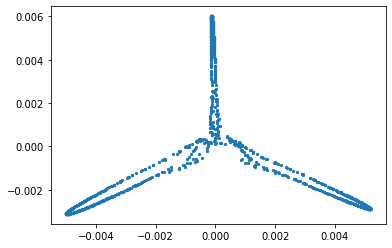

In [7]:
plt.scatter(spectral_data_ped.T[0], spectral_data_ped.T[1], s=5)
plt.show()

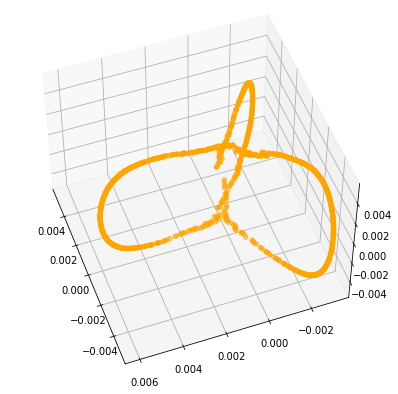

In [8]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211, projection='3d')

ax.scatter(spectral_data_ped.T[0], spectral_data_ped.T[1], spectral_data_ped.T[2], c='orange')
ax.view_init(50, 160)
plt.show()

In [9]:
#from pmlb import fetch_data
#adult = fetch_data('adult', local_cache_dir='pmlb/')

In [11]:
adult = pd.read_csv('../pmlb/adult/adult.tsv.gz', sep='\t')
print(adult.shape, 2*'\n', adult.head())

(48842, 15) 

     age  workclass    fnlwgt  education  education-num  marital-status  \
0  39.0          7   77516.0          9           13.0               4   
1  50.0          6   83311.0          9           13.0               2   
2  38.0          4  215646.0         11            9.0               0   
3  53.0          4  234721.0          1            7.0               2   
4  28.0          4  338409.0          9           13.0               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           1             1     4    1        2174.0           0.0   
1           4             0     4    1           0.0           0.0   
2           6             1     4    1           0.0           0.0   
3           6             0     2    1           0.0           0.0   
4          10             5     2    0           0.0           0.0   

   hours-per-week  native-country  target  
0            40.0              39       1  
1            13.0              